In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as sms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#import sklearn as skl

def set_graph_size(width=8, height=6):
  """Установка размеров изображения"""
  plt.rcParams["figure.figsize"] = width, height

In [11]:
#1
boston_dataframe = pd.DataFrame(pd.read_csv('boston.csv'))

In [12]:
#2-3

boston_dataframe.head()

boston_dataframe.info()

#У всех данных тип - float64 (числовой), пропущенных значений вроде нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
#4
boston_dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

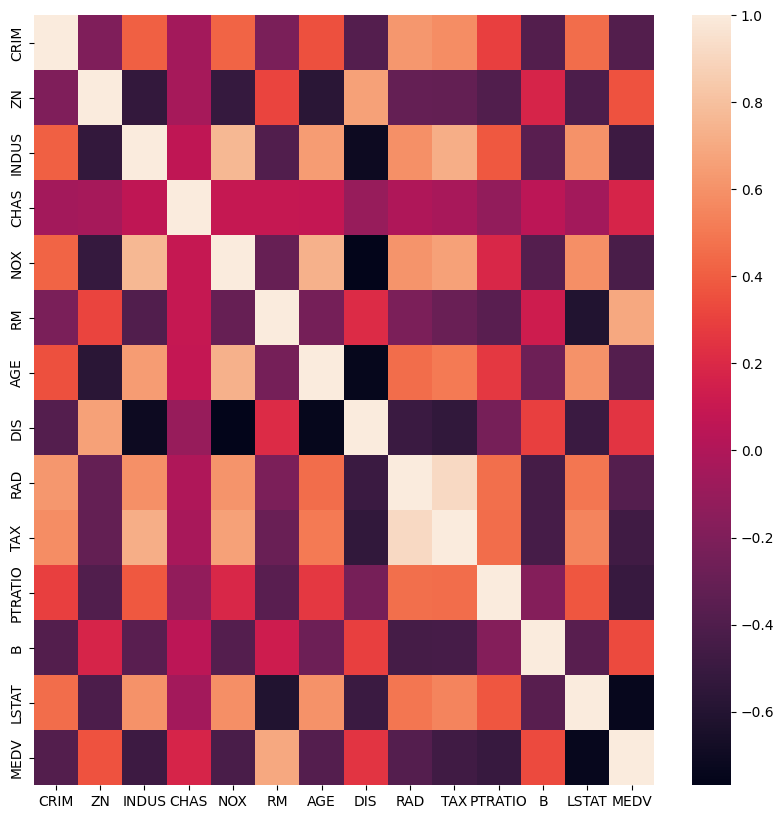

In [14]:
#5
plt.figure(figsize=(10,10))
sns.heatmap(boston_dataframe.corr())

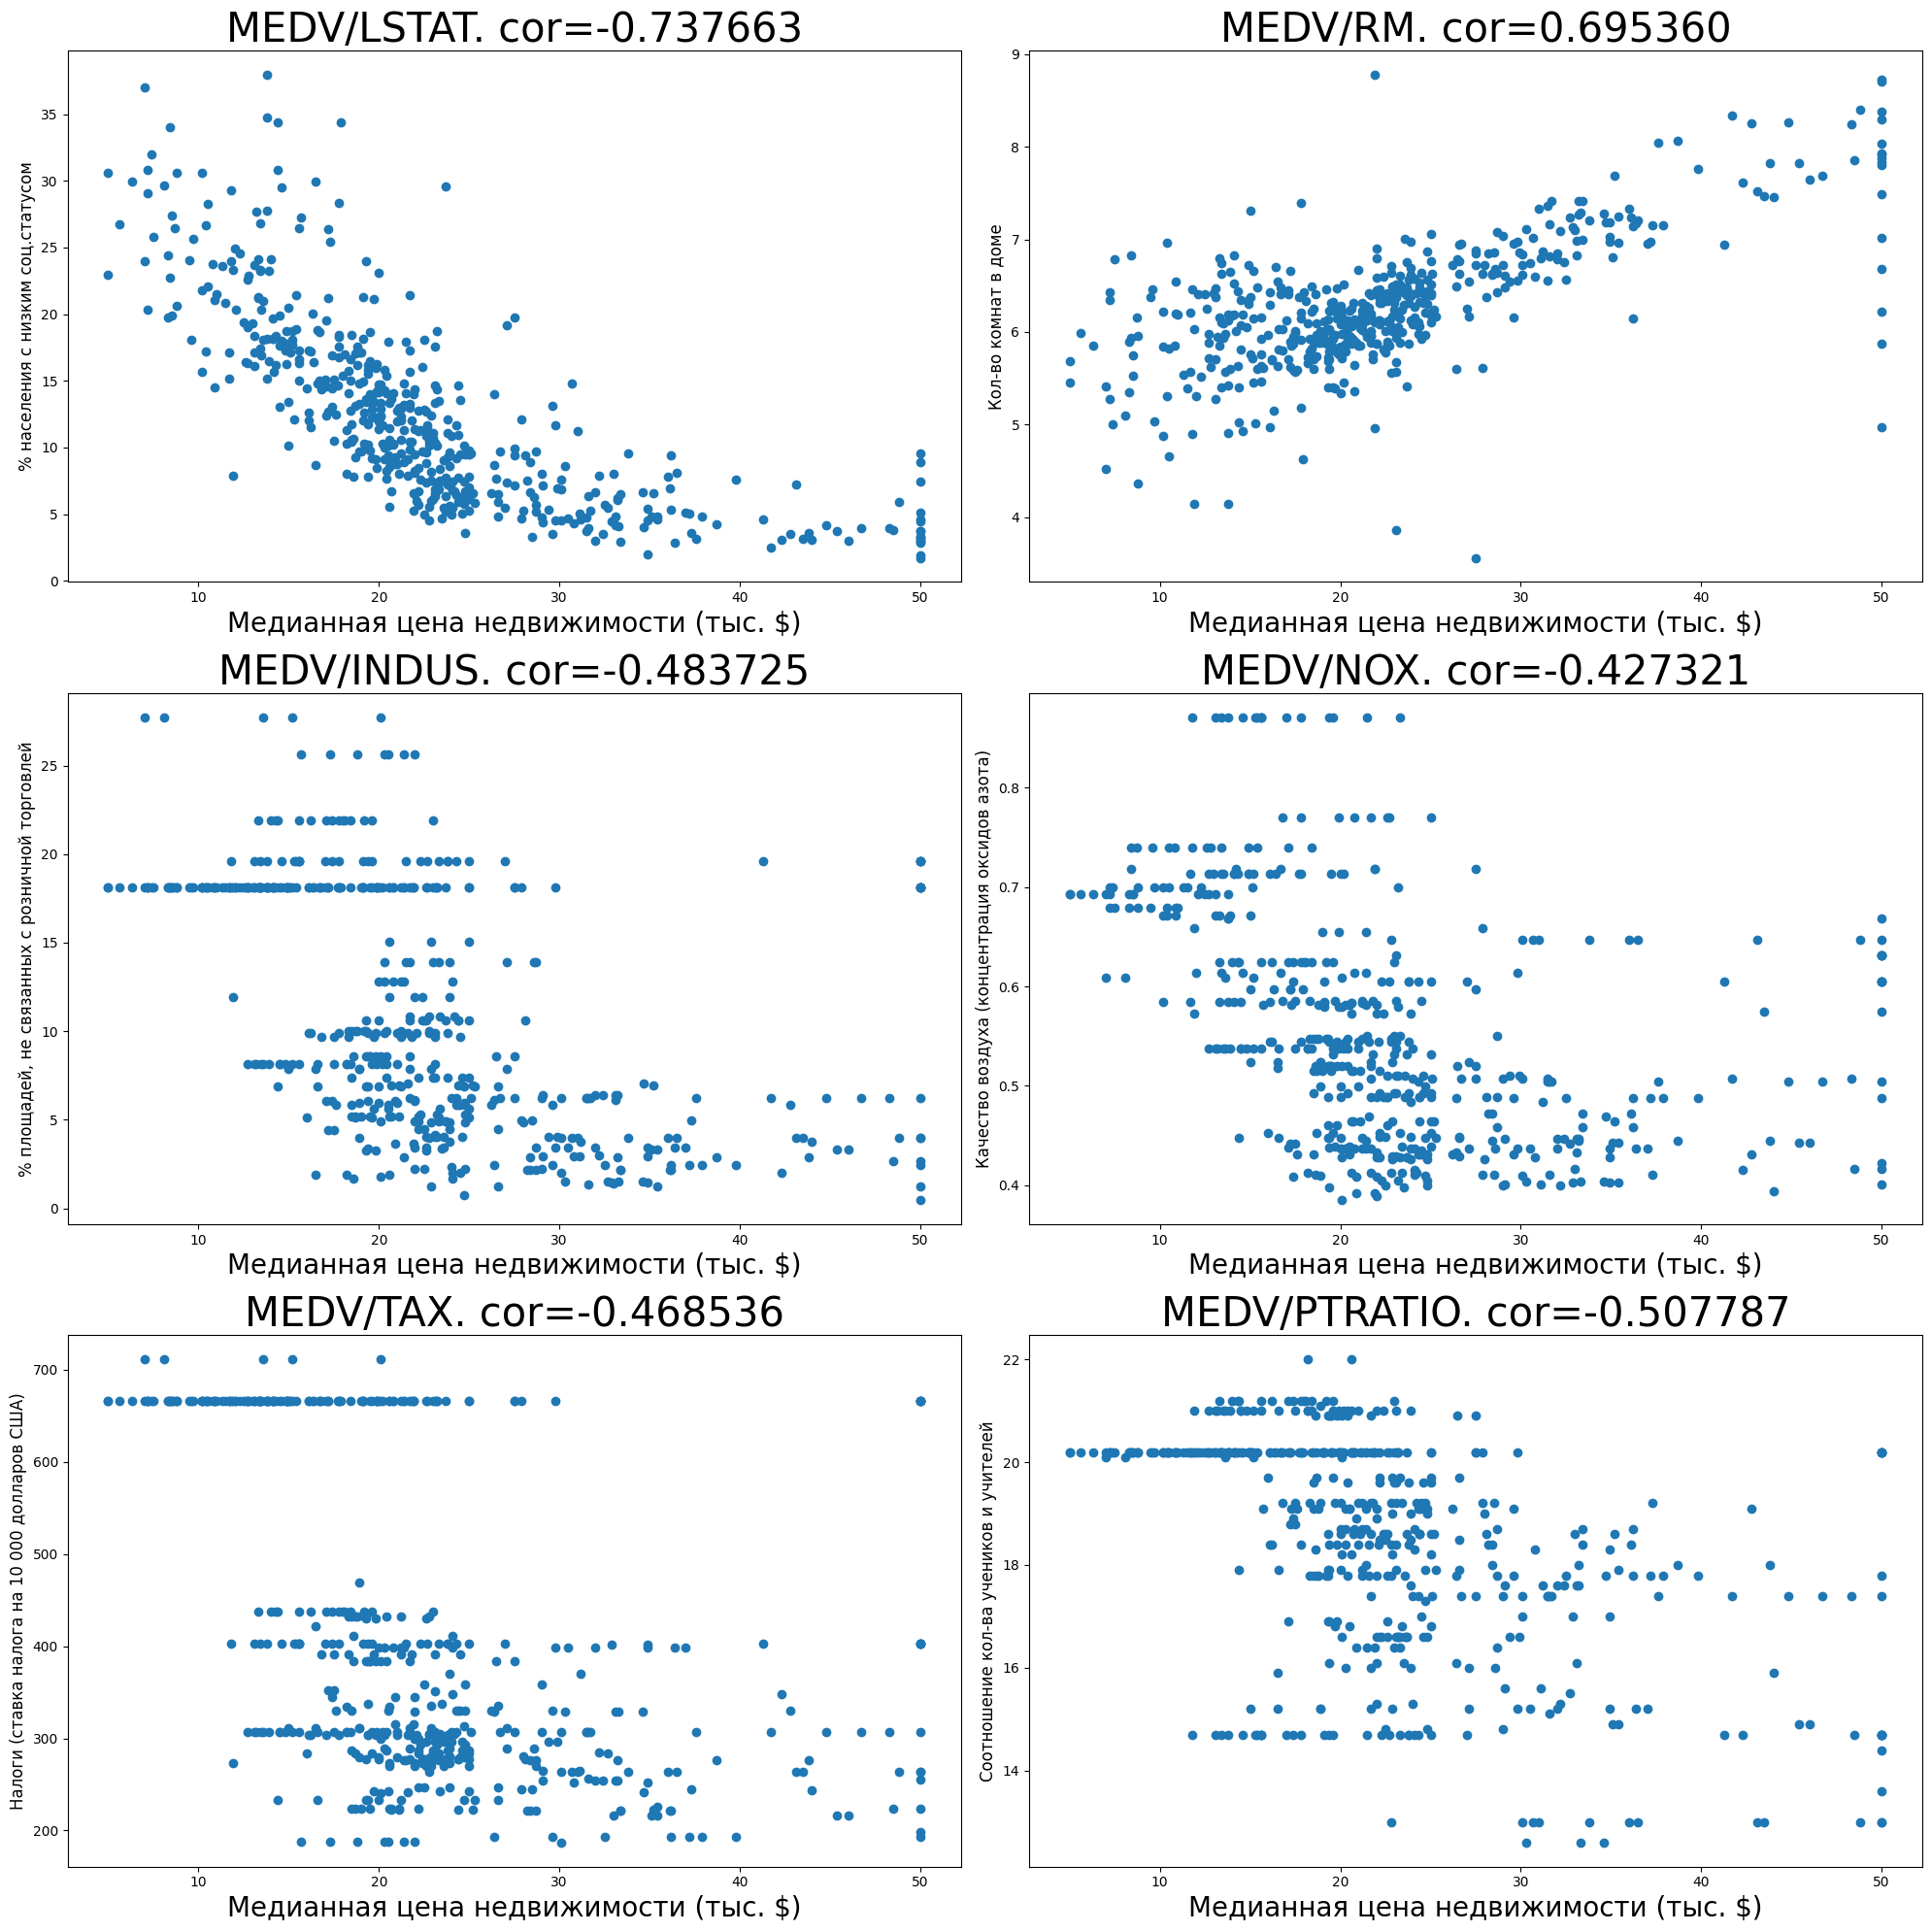

In [15]:
set_graph_size(20,20)

#-0.737663
plt.subplot(3,2,1)
plt.scatter(x='MEDV', y='LSTAT',
            data=boston_dataframe)
plt.title('MEDV/LSTAT. cor=-0.737663', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('% населения с низким соц.статусом', fontsize=12)

#0.695360
plt.subplot(3,2,2)
plt.scatter(x='MEDV', y='RM',
            data=boston_dataframe)
plt.title('MEDV/RM. cor=0.695360', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Кол-во комнат в доме', fontsize=12)

#-0.483725
plt.subplot(3,2,3)
plt.scatter(x='MEDV', y='INDUS',
            data=boston_dataframe)
plt.title('MEDV/INDUS. cor=-0.483725', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('% площадей, не связанных с розничной торговлей', fontsize=12)

#-0.427321
plt.subplot(3,2,4)
plt.scatter(x='MEDV', y='NOX',
            data=boston_dataframe)
plt.title('MEDV/NOX. cor=-0.427321', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Качество воздуха (концентрация оксидов азота)', fontsize=12)

#-0.468536
plt.subplot(3,2,5)
plt.scatter(x='MEDV', y='TAX',
            data=boston_dataframe)
plt.title('MEDV/TAX. cor=-0.468536', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Налоги (ставка налога на 10 000 долларов США)', fontsize=12)

#-0.507787
plt.subplot(3,2,6)
plt.scatter(x='MEDV', y='PTRATIO',
            data=boston_dataframe)
plt.title('MEDV/PTRATIO. cor=-0.507787', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Соотношение кол-ва учеников и учителей', fontsize=12)

plt.tight_layout()


Анализ графиков:

    1. (MEDV/LSTAT. cor=-0.737663) - Наблюдается сильная отрицательная зависимость. Чем ниже в процентном соотношении кол-во людей с низким социальным статусом, тем выше цены на жилье в рассматриваемом районе. 
    2. (MEDV/RM. cor=0.695360) - Наблюдается крайне сильная положительная зависимость. Чем больше в квартире комнат, тем выше цена такого жилья.
    3. (MEDV/INDUS. cor=-0.483725) - Наблюдается некоторая отрицательная зависимость. Чем меньше площади связанной с розничной торговлей,тем выше цены на такое жилье.    
    4. (MEDV/NOX. cor=-0.427321) - Наблюдается некоторая отрицательная зависимость. Чем ниже концентрация оксидов азота (чище воздух) в районе, тем выше цена жилья
    5. (MEDV/TAX. cor=-0.468536) - Наблюдается некоторая отрицательная зависимость. Чем ниже налог на жилье, тем выше в большинстве случаев его стоимость
    6. (MEDV/PTRATIO. cor=-0.507787) - Наблюдается некоторая отрицательная зависимость. Чем ниже процентное соотношение кол-ва учеников и учителей, тем выше цена жилья. 

In [21]:
# Используем для стандартизации значений, поскольку у нас есть большой разброс по значениям, а также мы измеряем в разных единицах измерения
#scaler = StandardScaler()

factors_array = pd.DataFrame({'LSTAT': boston_dataframe['LSTAT'], 
                            'RM': boston_dataframe['RM'], 
                            'INDUS': boston_dataframe['INDUS'], 
                            'NOX': boston_dataframe['NOX'],
                            'TAX': boston_dataframe['TAX'],
                            'PTRATIO': boston_dataframe['PTRATIO']})

target_array = pd.DataFrame({'MEDV': boston_dataframe['MEDV']})

X_train, X_test, y_train, y_test = sms.train_test_split(factors_array, target_array, test_size = 0.2, random_state=42)

print(f"Train shape: {X_train.shape[0]}")
print(f"Test shape: {X_test.shape[0]} ")

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print(f"Coefficient (slope): {lin_reg_model.coef_}")
print(f"Intercept: {lin_reg_model.intercept_}")

Train shape: 404
Test shape: 102 
Coefficient (slope): [[-5.45490256e-01  5.13856478e+00  1.21918051e-01 -2.92114206e+00
  -4.55420837e-03 -8.24986064e-01]]
Intercept: [14.3759793]


In [ ]:
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

print(y_train_pred, y_test_pred)
print(y_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(r2_train, r2_test)
print(rmse_train, rmse_test)

[[ 8.75807884]
 [20.43205294]
 [25.22838622]
 [13.74748631]
 [18.34939889]
 [26.63384641]
 [22.47162327]
 [27.22278448]
 [11.90746287]
 [19.56060154]
 [24.56176917]
 [24.1031253 ]
 [31.24493761]
 [18.42722343]
 [33.46371538]
 [14.83874856]
 [19.00252042]
 [28.49947561]
 [18.49264887]
 [26.68676147]
 [14.2638406 ]
 [22.66709322]
 [26.61188802]
 [23.20062167]
 [27.27656165]
 [31.82383417]
 [23.67536576]
 [38.34472442]
 [13.1652685 ]
 [26.06532661]
 [19.16214088]
 [19.32805248]
 [11.45649178]
 [21.63195871]
 [22.31192656]
 [32.58292584]
 [31.03100787]
 [16.62333506]
 [17.85162945]
 [29.53352551]
 [22.95823889]
 [12.3203442 ]
 [ 8.34640188]
 [24.94398373]
 [23.50262974]
 [16.9929058 ]
 [14.10009925]
 [40.21507393]
 [19.02605143]
 [17.87653825]
 [27.06457122]
 [22.51441771]
 [21.70924985]
 [21.98202456]
 [15.75200889]
 [23.26276373]
 [31.22153889]
 [11.52762086]
 [22.13105843]
 [18.45982443]
 [19.65161466]
 [25.37479779]
 [23.91293219]
 [22.83377655]
 [40.97270479]
 [17.03812737]
 [16.86573

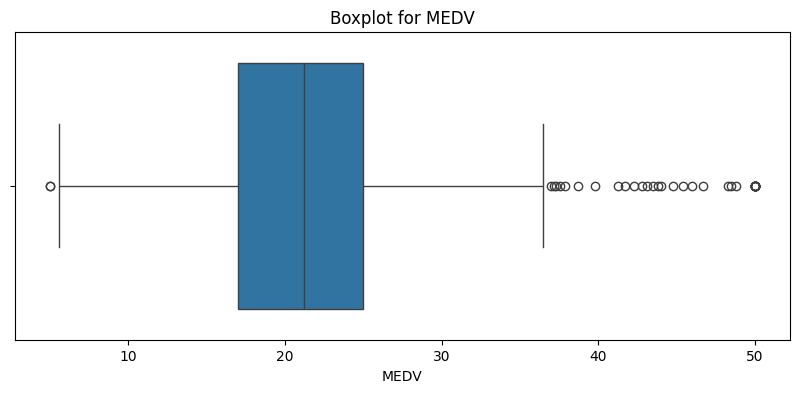

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=boston_dataframe['MEDV'])
plt.title('Boxplot for MEDV')
plt.xlabel('MEDV')
plt.show()